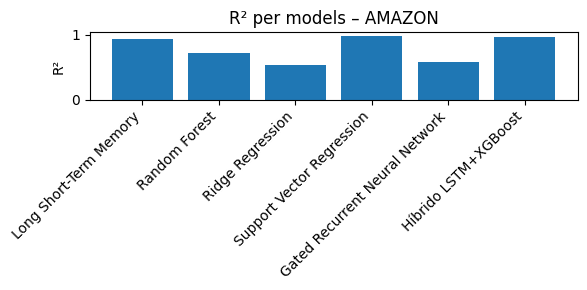

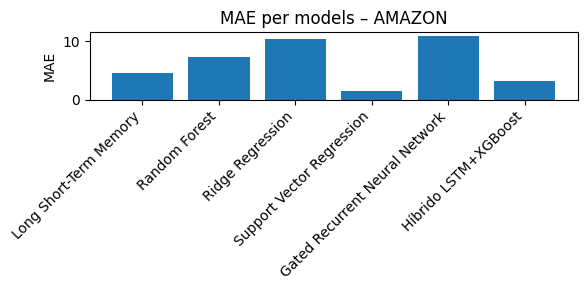

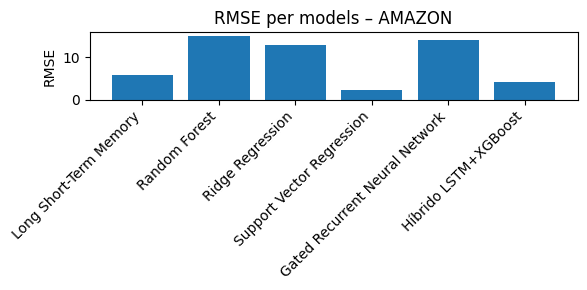

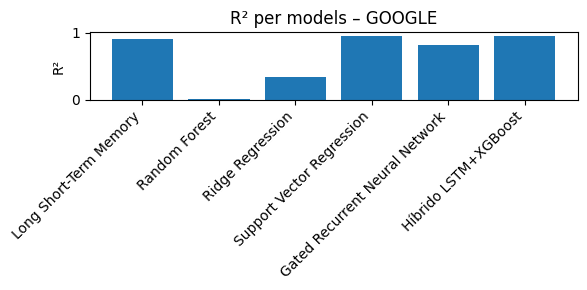

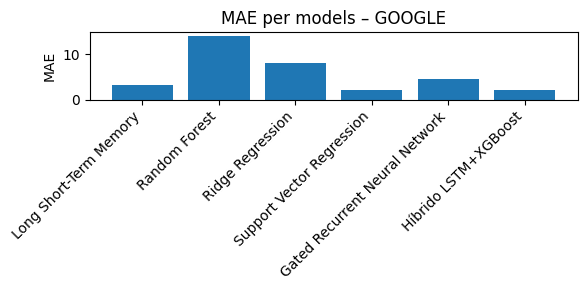

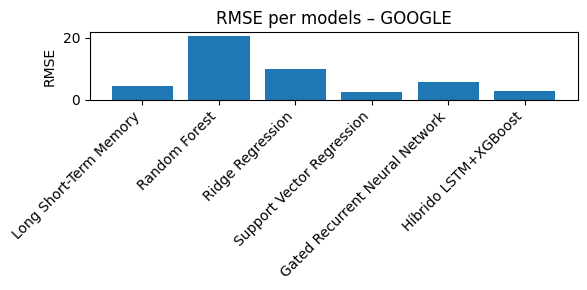

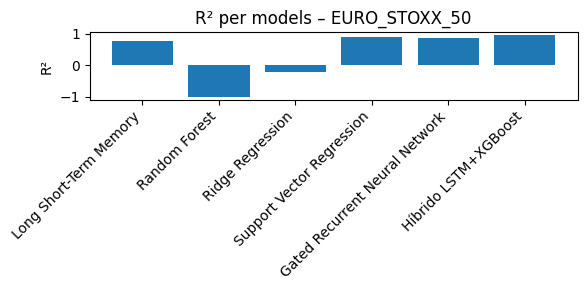

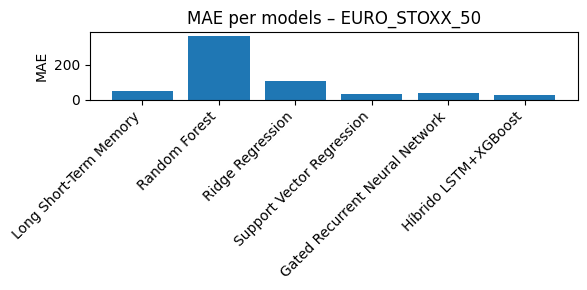

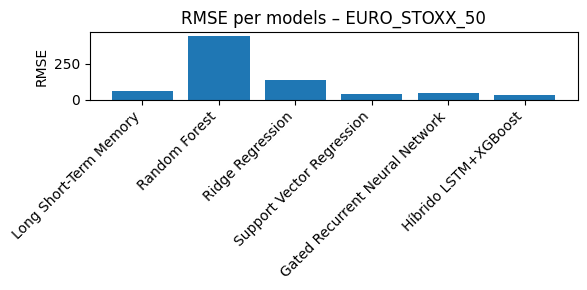

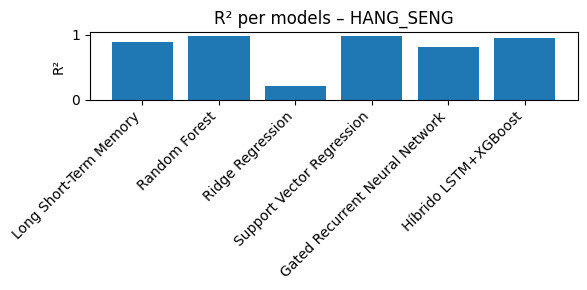

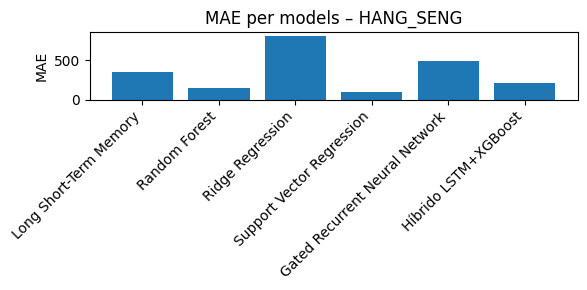

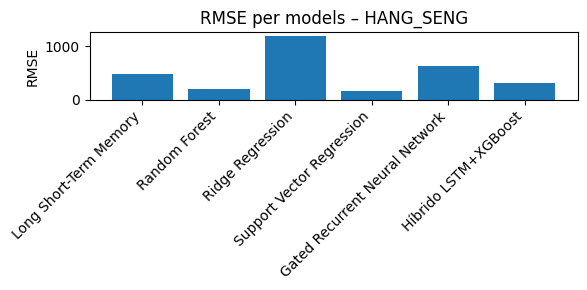

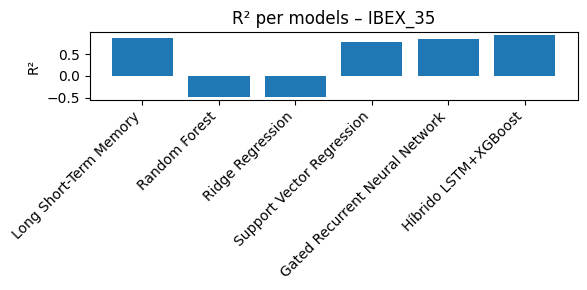

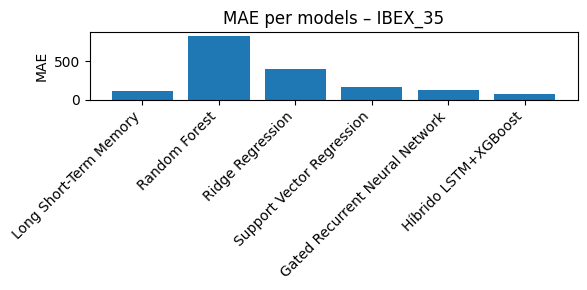

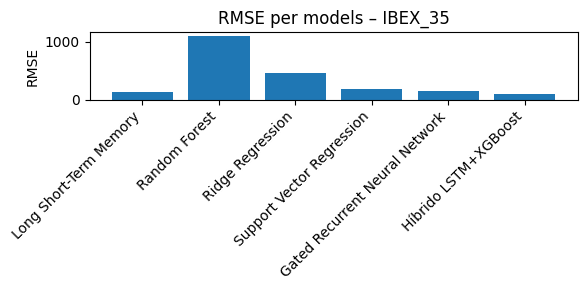

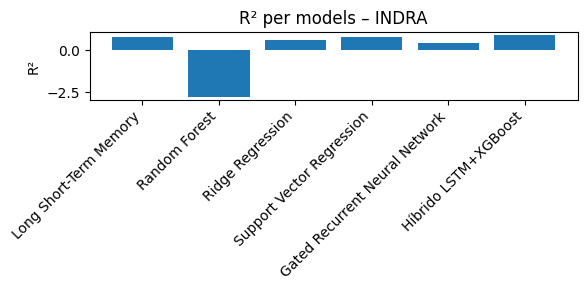

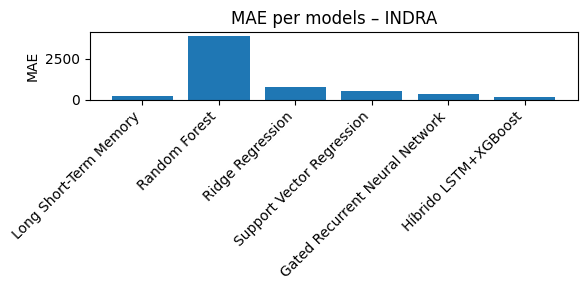

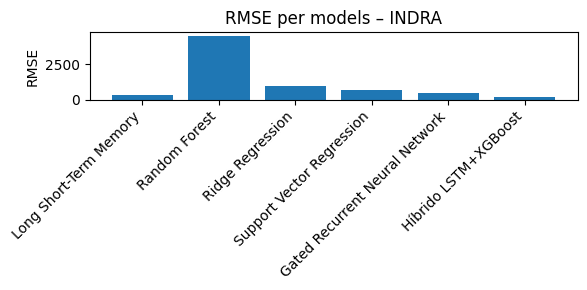

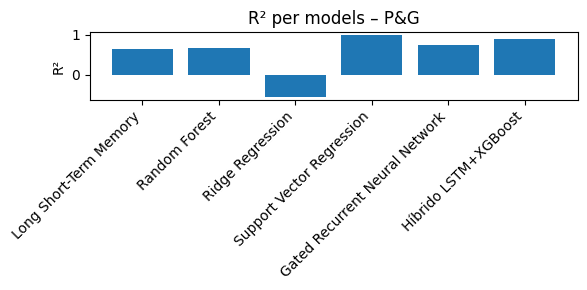

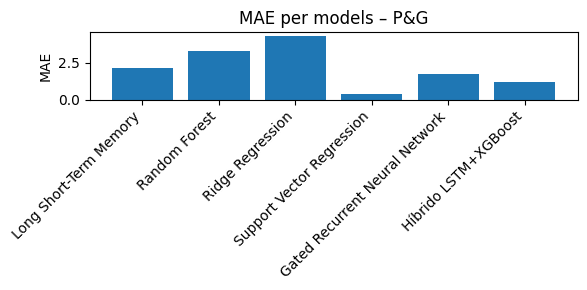

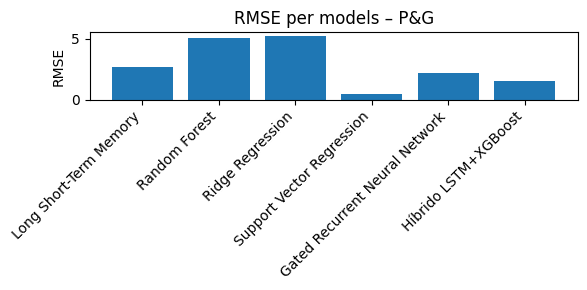

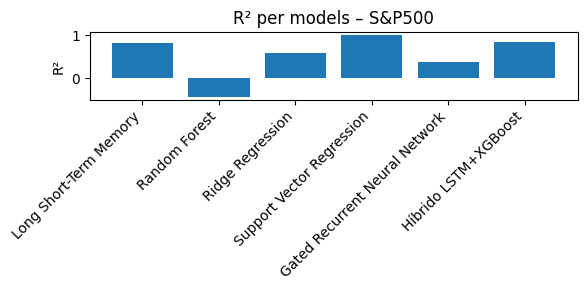

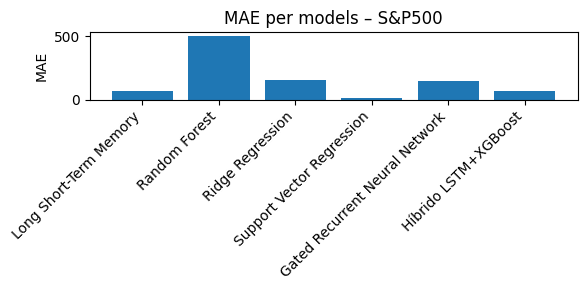

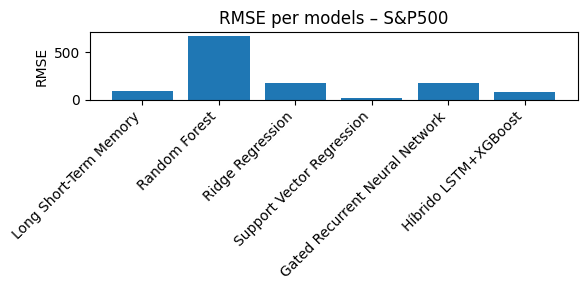

=== Mitjana global de R² per model ===
                         Model        R2
     Support Vector Regression  0.925025
          Híbrido LSTM+XGBoost  0.917037
        Long Short-Term Memory  0.823688
Gated Recurrent Neural Network  0.679728
              Ridge Regression  0.126763
                 Random Forest -0.283637

=== Mitjana global de MAE per model ===
                         Model        MAE
          Híbrido LSTM+XGBoost  70.672538
        Long Short-Term Memory 103.450850
     Support Vector Regression 109.694575
Gated Recurrent Neural Network 149.346387
              Ridge Regression 284.850662
                 Random Forest 721.539175

=== Mitjana global de RMSE per model ===
                         Model       RMSE
          Híbrido LSTM+XGBoost  95.448975
        Long Short-Term Memory 137.990525
     Support Vector Regression 138.225125
Gated Recurrent Neural Network 189.202625
              Ridge Regression 378.589763
                 Random Forest 875.890912


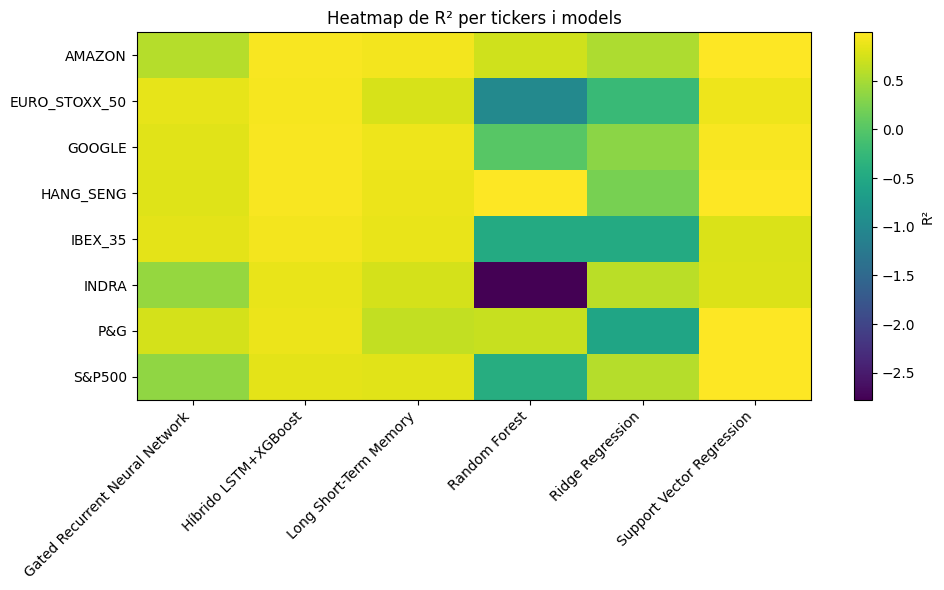

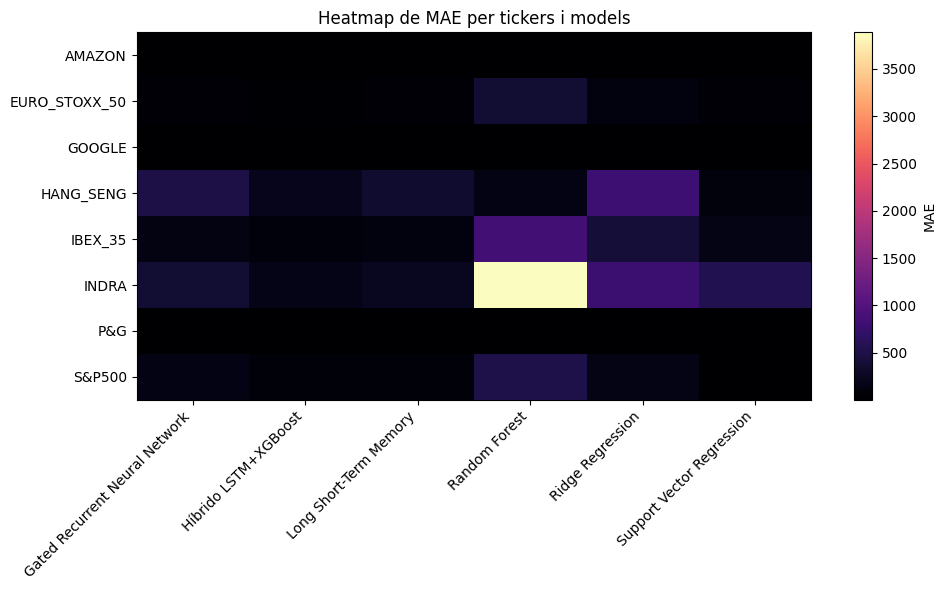

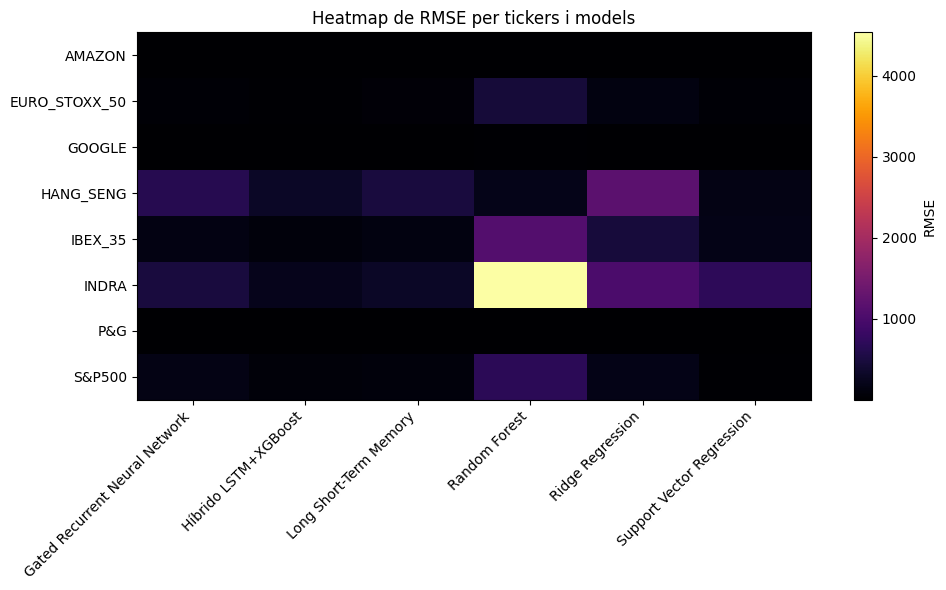

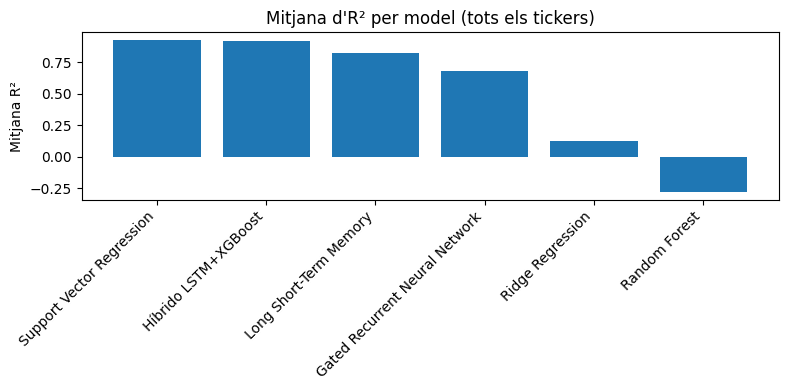

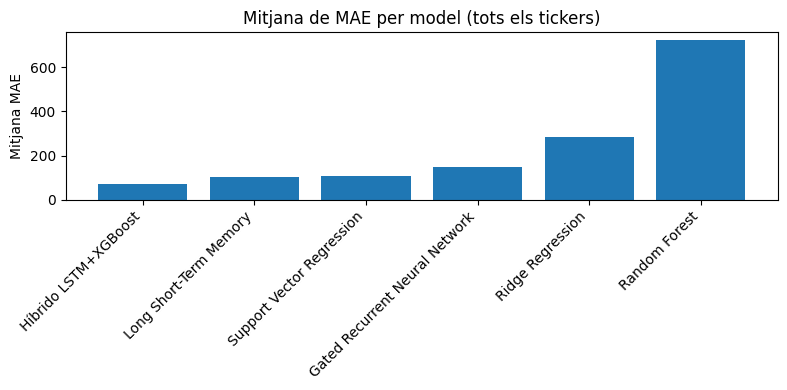

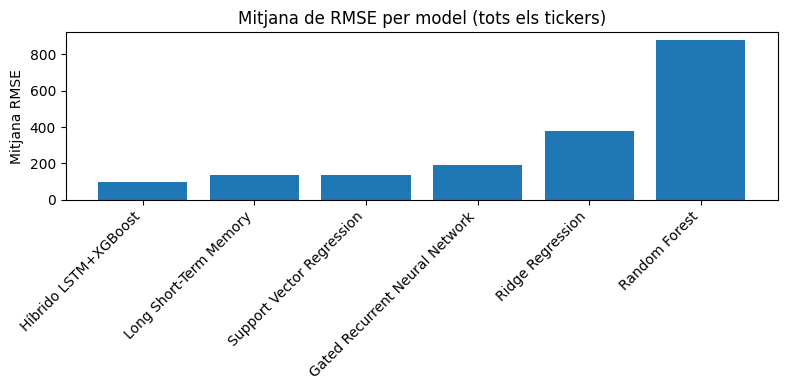

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Llegeix el CSV amb els resultats
csv_path = "models_metrics.csv"  
df = pd.read_csv(csv_path)

# Visualització ràpida per cada ticker: barplots de R², MAE i RMSE
tickers = df["Ticker"].unique()
for ticker in tickers:
    group = df[df["Ticker"] == ticker]
    
    # Barplot R²
    plt.figure(figsize=(6, 3))
    plt.bar(group["Model"], group["R2"])
    plt.title(f"R² per models – {ticker}")
    plt.ylabel("R²")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    
    # Barplot MAE
    plt.figure(figsize=(6, 3))
    plt.bar(group["Model"], group["MAE"])
    plt.title(f"MAE per models – {ticker}")
    plt.ylabel("MAE")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    
    # Barplot RMSE
    plt.figure(figsize=(6, 3))
    plt.bar(group["Model"], group["RMSE"])
    plt.title(f"RMSE per models – {ticker}")
    plt.ylabel("RMSE")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Mitjana global per model de R², MAE i RMSE
avg_r2  = df.groupby("Model")["R2"].mean().reset_index().sort_values(by="R2", ascending=False)
avg_mae = df.groupby("Model")["MAE"].mean().reset_index().sort_values(by="MAE")
avg_rmse= df.groupby("Model")["RMSE"].mean().reset_index().sort_values(by="RMSE")

print("=== Mitjana global de R² per model ===")
print(avg_r2.to_string(index=False))
print("\n=== Mitjana global de MAE per model ===")
print(avg_mae.to_string(index=False))
print("\n=== Mitjana global de RMSE per model ===")
print(avg_rmse.to_string(index=False))

# Heatmaps de R², MAE i RMSE
pivot_r2   = df.pivot(index="Ticker", columns="Model", values="R2")
pivot_mae  = df.pivot(index="Ticker", columns="Model", values="MAE")
pivot_rmse = df.pivot(index="Ticker", columns="Model", values="RMSE")

# Heatmap R²
plt.figure(figsize=(10, 6))
im1 = plt.imshow(pivot_r2, aspect='auto', cmap='viridis')
plt.colorbar(im1, label='R²')
plt.xticks(np.arange(len(pivot_r2.columns)), pivot_r2.columns, rotation=45, ha="right")
plt.yticks(np.arange(len(pivot_r2.index)), pivot_r2.index)
plt.title("Heatmap de R² per tickers i models")
plt.tight_layout()
plt.show()

# Heatmap MAE
plt.figure(figsize=(10, 6))
im2 = plt.imshow(pivot_mae, aspect='auto', cmap='magma')
plt.colorbar(im2, label='MAE')
plt.xticks(np.arange(len(pivot_mae.columns)), pivot_mae.columns, rotation=45, ha="right")
plt.yticks(np.arange(len(pivot_mae.index)), pivot_mae.index)
plt.title("Heatmap de MAE per tickers i models")
plt.tight_layout()
plt.show()

# Heatmap RMSE
plt.figure(figsize=(10, 6))
im3 = plt.imshow(pivot_rmse, aspect='auto', cmap='inferno')
plt.colorbar(im3, label='RMSE')
plt.xticks(np.arange(len(pivot_rmse.columns)), pivot_rmse.columns, rotation=45, ha="right")
plt.yticks(np.arange(len(pivot_rmse.index)), pivot_rmse.index)
plt.title("Heatmap de RMSE per tickers i models")
plt.tight_layout()
plt.show()

# Comparacions conjuntes: barplots de mitjana d'R², MAE i RMSE per model
plt.figure(figsize=(8, 4))
plt.bar(avg_r2["Model"], avg_r2["R2"])
plt.title("Mitjana d'R² per model (tots els tickers)")
plt.ylabel("Mitjana R²")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(avg_mae["Model"], avg_mae["MAE"])
plt.title("Mitjana de MAE per model (tots els tickers)")
plt.ylabel("Mitjana MAE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(avg_rmse["Model"], avg_rmse["RMSE"])
plt.title("Mitjana de RMSE per model (tots els tickers)")
plt.ylabel("Mitjana RMSE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
